In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

## 1 Experiment Overview: Free Trial Screener

At the time of this experiment, Udacity courses currently have two options on the course overview page: __"start free trial"__, and __"access course materials"__. If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.

___In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course.___ If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.

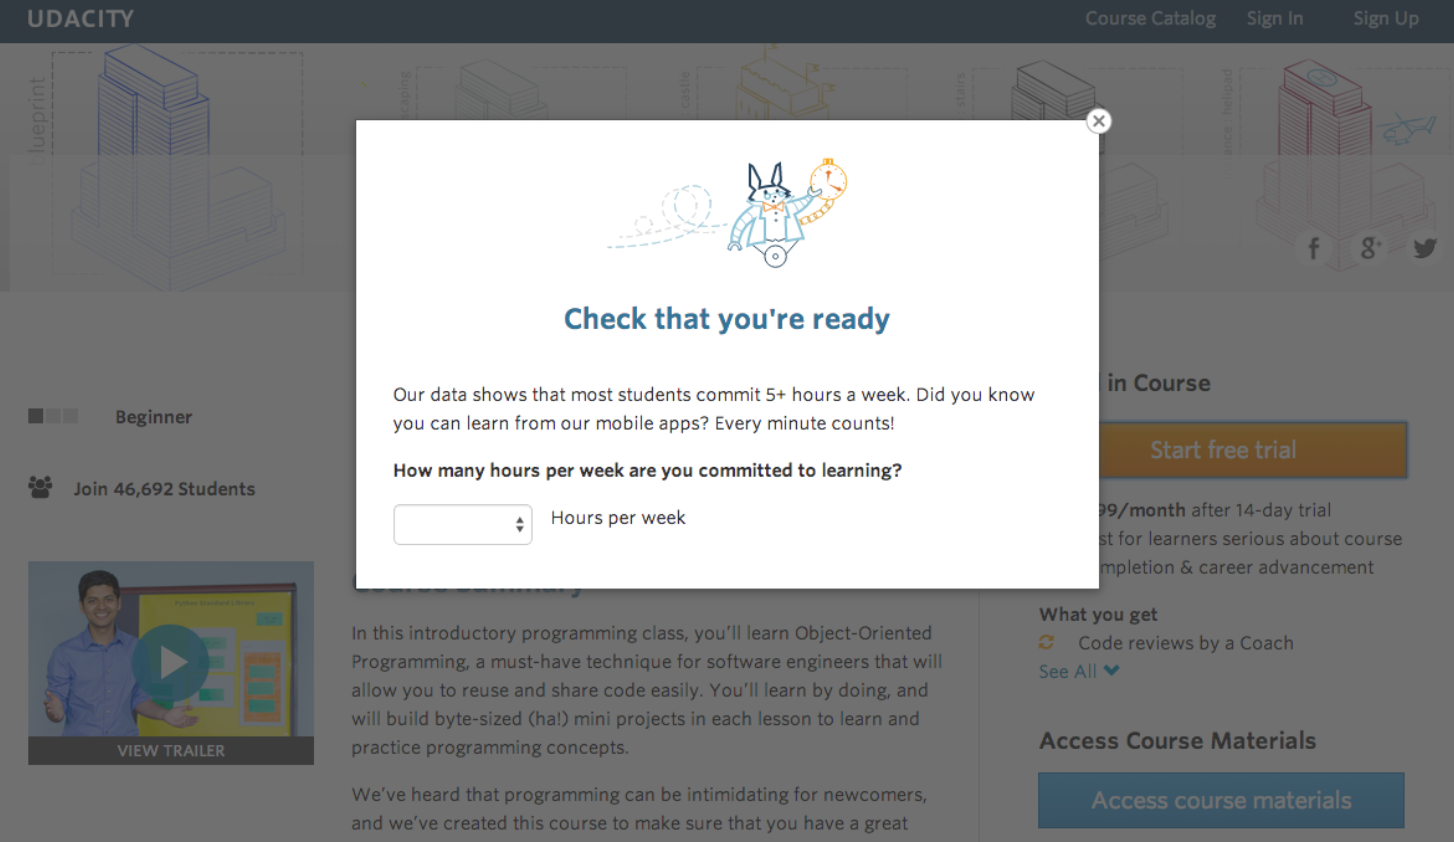

___The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course.___ If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

__The unit of diversion is a cookie__, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

## 2 Metric Choice

__Which of the following metrics would you choose to measure for this experiment and why?__ For each metric you choose, indicate whether you would use it as an invariant metric or an evaluation metric. The __practical significance boundary__ for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes.

Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.

- __Number of cookies__: Number of unique cookies to view the course overview page. (dmin=3000)
- __Number of user-ids__: Number of users who enroll in the free trial. (dmin=50)
- __Number of clicks__: Number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
- __Click-through-probability__: Number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
- __Gross conversion__: Number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
- __Retention__: Number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
- __Net conversion__: Number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)

You should also decide now what results you will be looking for in order to launch the experiment. Would a change in any one of your evaluation metrics be sufficient? Would you want to see multiple metrics all move or not move at the same time in order to launch? This decision will inform your choices while designing the experiment.


#### 2.1 Choosing Invariant Metrics
Invariant metrics are expected to remain unchanged throughout the experiment. One could expect a similar distribution of such metrics both on control and experiment side:
- __number of cookies__ (cannot be affected by the experiment: users made a decision to visit the page before they were asked the question);
- __number of clicks__ (cannot be affected by the experiment: users clicked the button before they were asked the question);
- __click-through probability__ (cannot be affected by the experiment: it equals to the number of clicks divided by the number of cookies).


#### 2.2 Choosing Evaluation Metrics
Evaluation metrics are expected to be different in the control and experimental groups. Those are chosen since there is a possibility of different distribution between experiment and control groups:
- __gross conversion__ (can be affected by the experiment / decrease: users could make a decision to enroll in the free trial in the experimental group less than in the control group because they did not plan to learn 5+ hours per week, less students enrolling in free trial but more students staying beyound the free trial);
- __retention__ (can be affected by the experiment / increase: enrolled users could be disappointed in the learning process less and make more payments in the experimental group than in the control group because they paid attention to studying 5+ hours per week);
- __net conversion__ (can be affected by the experiment / decrease: users could enroll in the free trial less in the experimental group than in the control group, thus could decrease the number of people who paid)


#### 2.3 Unused Metrics
- __Number of user-ids__ (User-ids are tracked only after enrolling in the free trial, and equal distribution between the control and experimental branches would not be expected. From one side, the new pop-up message is likely to decrease the total number of user-ids who enrolled in the free trial, so it is not invariant; from the other side, it is not normalized, the number of visitors may be different between the experiment and control groups. Thus user-id is not good for evaluation.)


#### 2.4 Goals of Experiment
- the number of payments should not be decreased;
- minimized the number of students who were frustrated and had not paid because they could not study enough time;
- utilized the limited coaching resources efficiently


## 3 Measuring Viariability
This spreadsheet contains rough estimates of the baseline values for these metrics (again, these numbers have been changed from Udacity's true numbers).

For each metric you selected as an evaluation metric, estimate its standard deviation analytically. Do you expect the analytic estimates to be accurate? That is, for which metrics, if any, would you want to collect an empirical estimate of the variability if you had time?

In [2]:
baseline_values = pd.read_csv('/Users/liqingran/Desktop/A:BTesting/Baseline_Values.csv', header=None, names=['Metrics', 'Values'])
baseline_values

,Metrics,Values
0,Unique cookies to view course overview page pe...,40000.000000
1,"Unique cookies to click ""Start free trial"" per...",3200.000000
2,Enrollments per day:,660.000000
3,"Click-through-probability on ""Start free trial"":",0.080000
4,"Probability of enrolling, given click:",0.206250
5,"Probability of payment, given enroll:",0.530000
6,"Probability of payment, given click",0.109313


### 3.1 Calculating standard deviation
For each metric you selected as an evaluation metric, make an analytic estimate of its standard deviation, given a sample size of 5000 cookies visiting the couse overview page.
Given that
$$SD = \sqrt{\frac{\widehat{p}(1-\widehat{p})}{N}}$$ 

In [3]:
click_through_prob = 0.08
enroll_given_click_prob = 0.206250
pay_given_enroll_prob = 0.53
pay_given_click_prob = 0.109313

In [4]:
num_cookies = 5000 # sample size of cookies visiting the course overview page
num_clicks = num_cookies * click_through_prob # number of clicks on "Start free trial"
num_enrollments = num_clicks * enroll_given_click_prob

print("Number of Cookies:", num_cookies)
print("Number of Clicks:", num_clicks)
print("Number of Enrollments:", num_enrollments)

Number of Cookies: 5000
Number of Clicks: 400.0
Number of Enrollments: 82.5


In [5]:
GrossConversion_SD = round(np.sqrt(enroll_given_click_prob*(1-enroll_given_click_prob)/num_clicks), 4)
Retention_SD = round(np.sqrt(pay_given_enroll_prob*(1-pay_given_enroll_prob)/num_enrollments), 4)
NetConversion_SD = round(np.sqrt(pay_given_click_prob*(1-pay_given_click_prob)/num_clicks), 4)

print("Standard Deviation of Gross Conversion:", GrossConversion_SD)
print("Standard Deviation of Retention:", Retention_SD)
print("Standard Deviation of Net Conversion:", NetConversion_SD)

Standard Deviation of Gross Conversion: 0.0202
Standard Deviation of Retention: 0.0549
Standard Deviation of Net Conversion: 0.0156


I would like to expect the analytical variance is close to the empirical variance for the Gross Conversion and for the Net Conversion, since the denominator for these two indicators is the number of clicks, which is also the unit of diversion.

And it would be useful to collect an empirical estimate of the variability for the Retention, since it's not the unit of diversion, the analytical variance might be lower than the empirical variance.


## 4 Sizing
### 4.1 Choosing Number of Samples given Power
Using the analytic estimates of variance, how many pageviews total (across both groups) would you need to collect to adequately power the experiment? Use an alpha of 0.05 and a beta of 0.2. Make sure you have enough power for each metric.

I can use the sample size calculator, then the sample size for each metric would be as follows:

__Sample Gross Conversion__

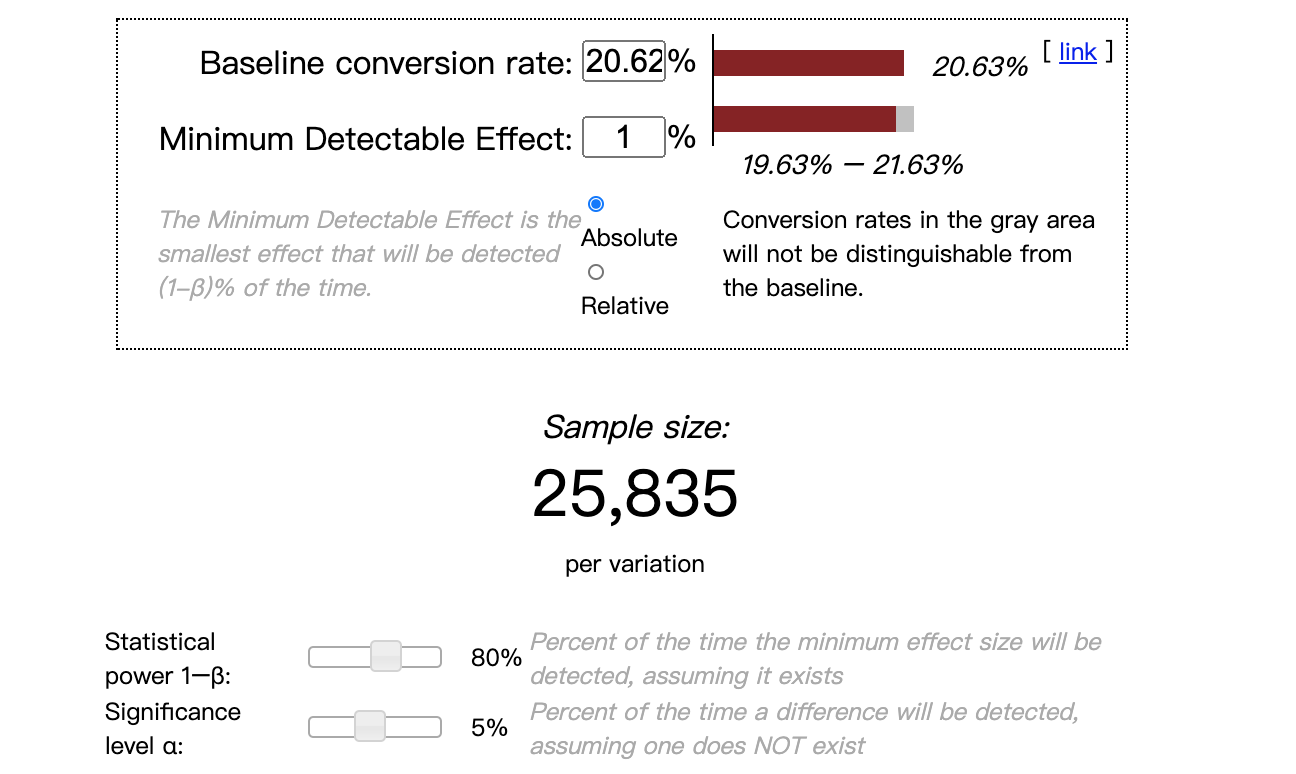

__Sample Sizes for Retention__
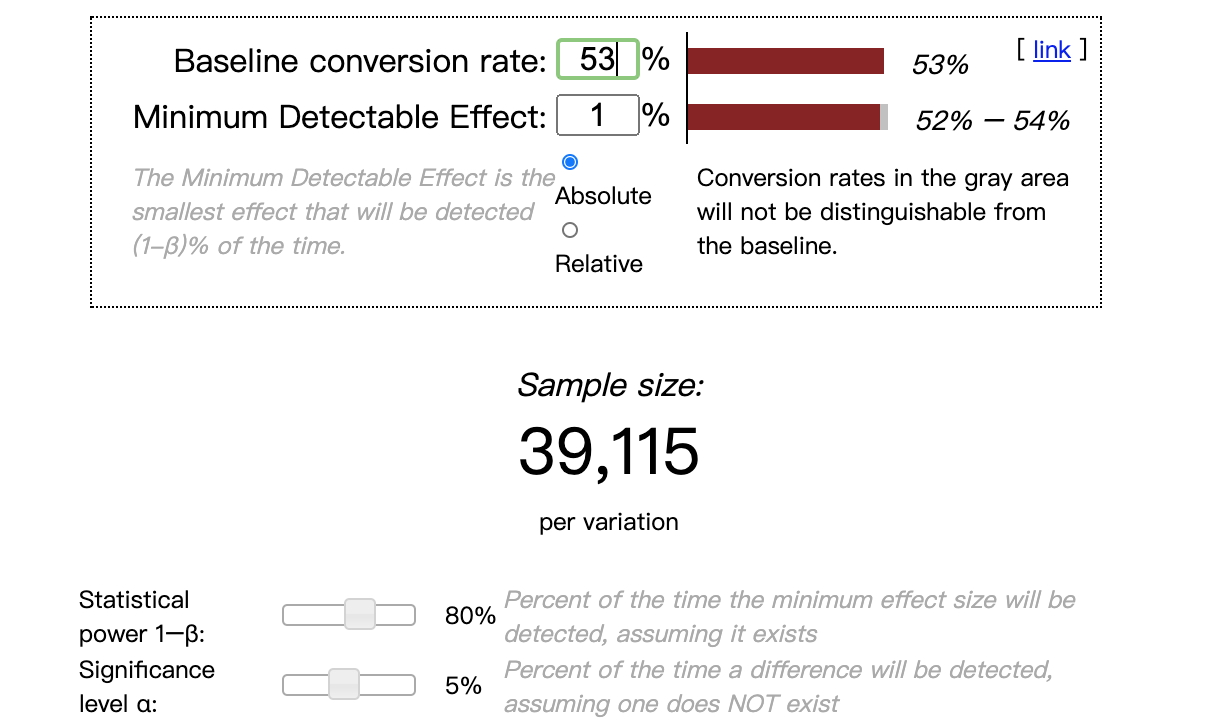

__Sample Sizes for Net Conversion__
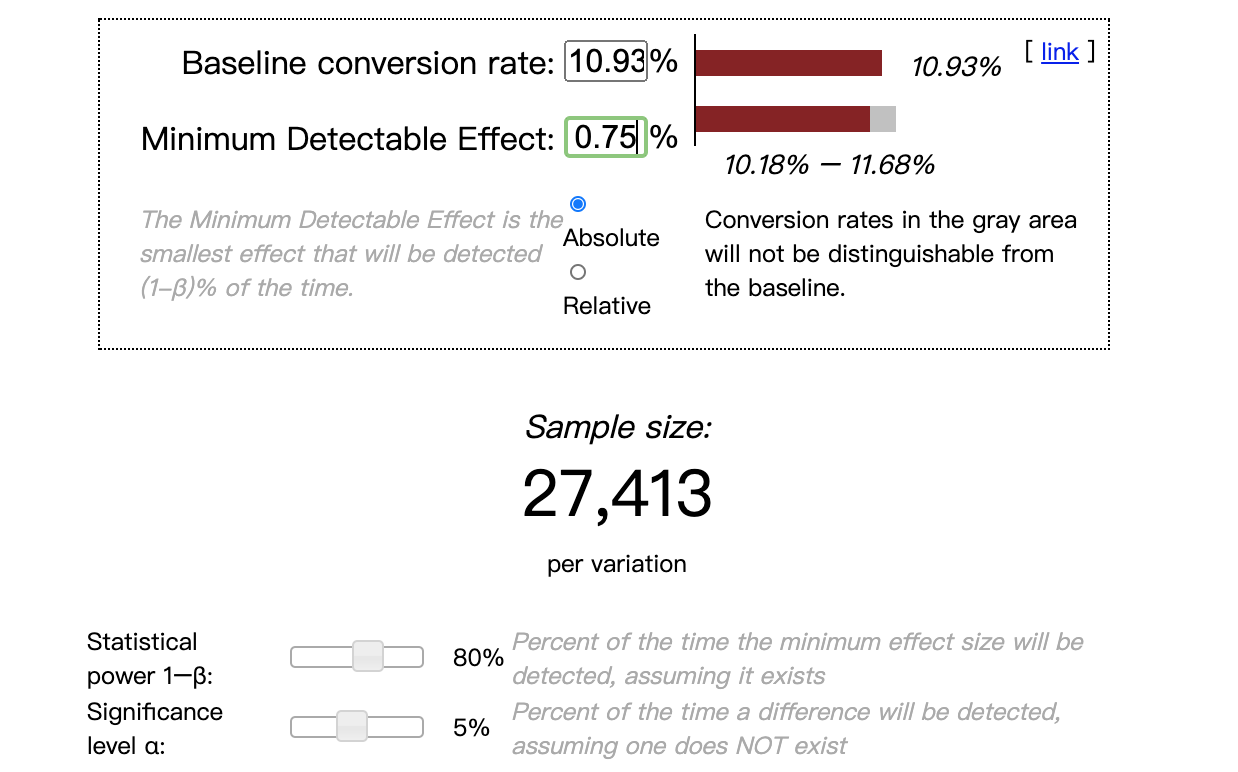

These are the sample-sizes of one group of the experiment, so for the whole experiment we need to double each digit.

Significant level remains 0.05 based on the fact that we have multiple metrics.

I did not use Bonferroni correction to adjust significant level, because these metrics are closely related to each other, and Bonferroni would be too conservative, and causing the inflamation of the sample sizes. It is possible to reduce the alpha in order to reduce the false positive probability of the whole test.


In [6]:
num_groups = 2    # 1 experiment, 1 control
gross_conversion_size = 25835
retension_size = 39115
net_conversion_size = 27413

In [7]:
num_unique_view_cookies = baseline_values['Values'][0]
num_unique_click_cookies = baseline_values['Values'][1]
num_enroll_day = baseline_values['Values'][2]

In [8]:
# Calculate required overview cookies
gross_conversion = int(num_groups * gross_conversion_size * num_unique_view_cookies / num_unique_click_cookies)
retention = int(num_groups * retension_size * num_unique_view_cookies / num_enroll_day)
net_conversion = int(num_groups * net_conversion_size * num_unique_view_cookies / num_unique_click_cookies)

# print("Gross Conversion is", gross_conversion)
# print("Retention is", retention)
# print("Net Conversion is", net_conversion)

df_size = pd.DataFrame({'Metric': ['Gross Conversion', 'Retention', 'Net Conversion'],
                       'Sample_Size': [25835, 39115, 27413],
                       'Required_Overview_Cookies': [gross_conversion, retention, net_conversion]})
df_size

,Metric,Sample_Size,Required_Overview_Cookies
0,Gross Conversion,25835,645875
1,Retention,39115,4741212
2,Net Conversion,27413,685325



Also, It's possible to use the provided functions for incorporation of the standard error.
Strategy: For a bunch of Ns, compute the z_star by achieving desired alpha, then compute what beta would be for that N using the acquired z_star. Pick the smallest N at which beta crosses the desired value.

In [10]:
alpha = 0.05   # Significant level for 95% confidence interval
beta = 0.2     # sensitivity of 0.8

In [11]:
# Inputs: The desired alpha for a two-tailed test
# Returns: The z-critical value
def get_z_score(alpha):
    return -norm.ppf(alpha/2)


# Inputs:
#   z-star: The z-critical value
#   s: The standard error of the metric at N=1
#   d_min: The practical significance level
#   N: The sample size of each group of the experiment
# Returns: The beta value of the two-tailed test
def get_beta(z, s, d_min, N):
    SE = s / np.sqrt(N)
    return norm.cdf(z*SE, loc=d_min, scale=SE)


# Inputs:
#   s: The standard error of the metric with N=1 in each group
#   d_min: The practical significance level
#   Ns: The sample sizes to try
#   alpha: The desired alpha level of the test
#   beta: The desired beta level of the test
# Returns: The smallest N out of the given Ns that will achieve the desired
#          beta. There should be at least N samples in each group of the experiment.
#          If none of the given Ns will work, returns -1. N is the number of
#          samples in each group.
def required_size(s, d_min, Ns, alpha=0.05, beta=0.2):
    for N in Ns:
        if (get_beta(get_z_score(alpha), s, d_min, N) <= beta):
            return N
    return -1

In [12]:
n = 1
Ns = range(1, 500000)

# For Gross Conversion
d_min_gross_conversion = 0.01
SE_gross_conversion = np.sqrt(enroll_given_click_prob*(1-enroll_given_click_prob )/n)
gross_conversion_req_size = required_size(SE_gross_conversion, d_min_gross_conversion, Ns, alpha, beta)

# For retention
d_min_retention = 0.01
SE_retention = np.sqrt(pay_given_enroll_prob*(1-pay_given_enroll_prob)/n)
retention_req_size = required_size(SE_retention, d_min_retention, Ns, alpha, beta)

# For Net Conversion
d_min_net_conversion = 0.0075
SE_net_conversion = np.sqrt(pay_given_click_prob*(1-pay_given_click_prob)/n)
net_conversion_req_size = required_size(SE_net_conversion, d_min_net_conversion, Ns, alpha, beta)

print("Required Size of Gross Conversion: ", gross_conversion_req_size)
print("Required Size of Retention: ", retention_req_size)
print("Required Size of Net Conversion: ", net_conversion_req_size)

Required Size of Gross Conversion:  12850
Required Size of Retention:  19552
Required Size of Net Conversion:  13586


As we can see, the sample sizes shrink a lot using the functions with SE! Thus, we need to choose between these two sample size calculation methods.

### 4.2 Choosing Duration vs. Exposure
What percentage of Udacity's traffic would you divert to this experiment (assuming there were no other experiments you wanted to run simultaneously)? Is the change risky enough that you wouldn't want to run on all traffic?

Given the percentage you chose, how long would the experiment take to run, using the analytic estimates of variance? If the answer is longer than a few weeks, then this is unreasonably long, and you should reconsider an earlier decision.

In [13]:
baseline_values['Metrics'][0]

'Unique cookies to view course overview page per day:'

In [14]:
df_size

,Metric,Sample_Size,Required_Overview_Cookies
0,Gross Conversion,25835,645875
1,Retention,39115,4741212
2,Net Conversion,27413,685325


In [15]:
num_pageviews = 4741212
num_days = num_pageviews/num_unique_view_cookies
num_days

118.5303

Base on the above talbe, there're almost 5,000,000 unique cookies for the experiment needed. Considering 40000 unique cookies to view course overview page per day (stated in baseline_values table), and if we divert 100% off the trafic, it needs almost 119 days to this experiment. That takes a long time!

Thus, we need to reduce this duration, one way is to consider using percent reduction that we don't want to guide 100% of the trafic to the experiment. The reason to that is the experiment may cause some unexpected side-effects, so it's better not to expose all traffic to it.

We can try to loosen the power of the test, and increase the alpha for the retention, since this metric generates sizes larger than the other two and use different unit of diversion, thus become our bottleneck.

If I increase the practical significance to 2%, rather than the default 1%. I get the folloing results:
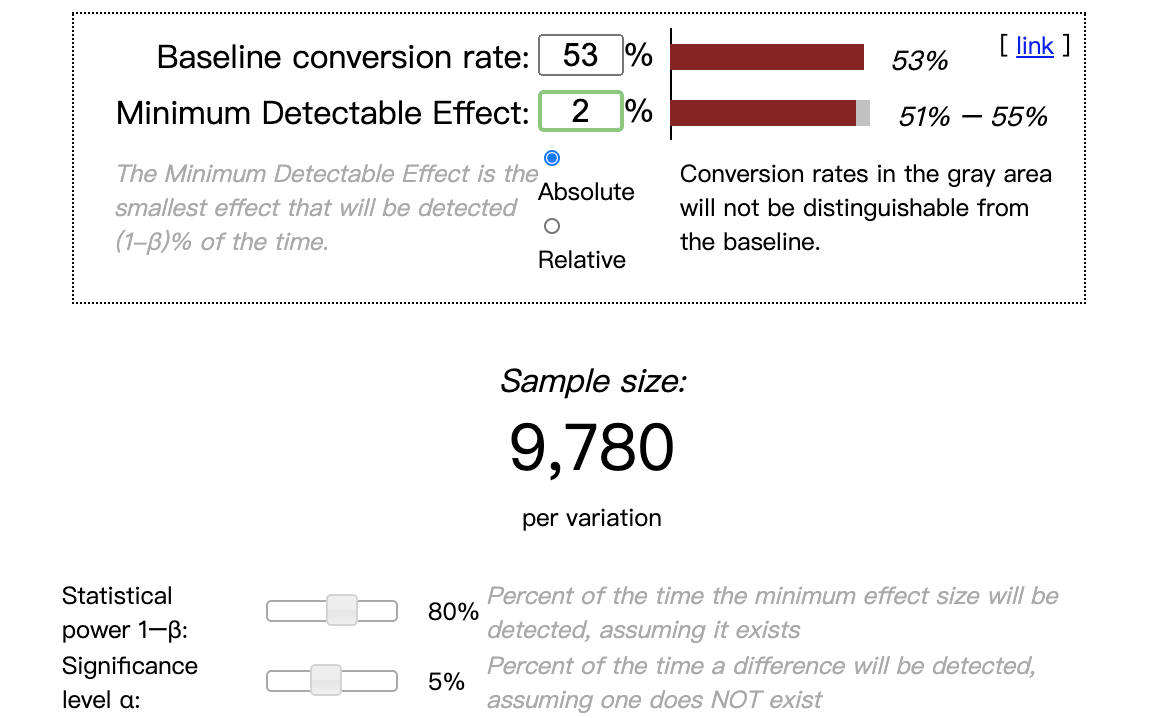

In [16]:
retention_cookies_2 = int(num_groups * 9780 * num_unique_view_cookies / num_enroll_day)
retention_cookies_2, retention_cookies_2/num_unique_view_cookies

(1185454, 29.63635)

Thus, if I loosen the practical significnce to 2%, the total unique cookies required is 1185454, and the minimum days for the experiment reduced to 30 days.


There is another choice. If we reduce the number of test metrics and choose only two of them: the gross conversion and the net conversion, since the provided data about the traffic is indufficient for keeping the retention.

So I reset the number of pageviews equal to 685325.

In [17]:
num_pageviews = 685325
num_pageviews/num_unique_view_cookies, num_pageviews/(num_unique_view_cookies*0.6)

(17.133125, 28.555208333333333)

For the experiment with the gross conversion and the net conversion, we can use the period around 18 days with the 100% traffic level. This interval is much better, but it gives us the result too quickly. The behavior of people in the field of education is quite difficult to analyze and trends in this area could be rarely detected in a short time period for 2-3 weeks. To slightly increase the time interval, we can set the percentage of used traffic at 60% (fraction = 0.6) and it gives us the number: 29 days.

*It is also possible to take into consideration that the commercial risk is low: the site offers students to better plan and to evaluate their training time. The assumption of a sharp decrease in payments as a result of the pilot warning is devoid of practical foundation. For investments, the decisive factor is the first free period as a way to assess their own abilities, and it does not change during the experiment. The number of payments theoretically may slightly decrease due to the lower number of subscriptions, but this is only an assumption. Students who spend less than 5 hours a week are hardly able to complete the program successfully. In most cases, we are talking about reducing the waste of time for students and mentors.*

*And there is no risk in terms of privacy violation at all. Users do not enter any additional information about themselves in the process of the experiment except a little piece of information about planning.*

*It should be noted that the use of the fraction 0.6 does not affect the commercial interests seriously. From one side, the time interval and therefore the risk will increase. From another side, we keep the certain number of pageviews, therefore the experimental audience and the risk will not increase. It means our experiment could not practically be risky for the business.*

*Removing one indicator in the main part of the project, I want to analyze the experimental data in the last section on my own initiative a little bit wider and to determine what happens to the metrics "Retention" as the most interesting in terms of the psychological effect and the most unpredictable.*

## 5 Analysis
The meaning of each column is:
- __Pageviews__: Number of unique cookies to view the course overview page that day.
- __Clicks__: Number of unique cookies to click the course overview page that day.
- __Enrollments__: Number of user-ids to enroll in the free trial that day.
- __Payments__: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [18]:
control = pd.read_csv('/Users/liqingran/Desktop/A:BTesting/Results_Control.csv')
experiment = pd.read_csv('/Users/liqingran/Desktop/A:BTesting/Results_Experiment.csv')

### 5.1 Sanity Checks
Start by checking whether your invariant metrics are equivalent between the two groups. If the invariant metric is a simple count that should be randomly split between the 2 groups, you can use a binomial test as demonstrated in Lesson 5. Otherwise, you will need to construct a confidence interval for a difference in proportions using a similar strategy as in Lesson 1, then check whether the difference between group values falls within that confidence level.

If your sanity checks fail, look at the day by day data and see if you can offer any insight into what is causing the problem.

__The first step in validation of the experiment is assessment of invariant metrics.__ There are some metrics that are expected to have more or less identical values in the both experiment and control groups.

Now using these data, we need to check whether the values of these metrics are significantly different in the experiment and control groups.

In [19]:
control_pageviews = control['Pageviews'].sum()
experiment_pageviews = experiment['Pageviews'].sum()

control_clicks = control['Clicks'].sum()
experiment_clicks = experiment['Clicks'].sum()

In [20]:
summary = pd.DataFrame({'Control': [control_pageviews, control_clicks],
                       'Experiment': [experiment_pageviews, experiment_clicks]},
                      index = ['Pageviews', 'Clicks'])
summary

,Control,Experiment
Pageviews,345543,344660
Clicks,28378,28325



- __Null Hypothesis__: Any difference between the metric value of the two groups is due to chance. 
- __Alternate Hypothesis__: The difference between the metric value of the two groups is meaningful, and significant. It cannot be due to random change.

__Invarient Metrics__
- Number of cookies
- Number of clicks on "Start free trial"
- Click-through-probability on "Start free trial"

In [21]:
# fraction of the control group on the total, p_hat
summary['Ratio'] = summary['Control'] / (summary['Control'] + summary['Experiment'])

# suppose we divide the traffic by 50% and 50%
summary['Prob'] = 0.5
summary['StdErr'] = np.sqrt(summary['Prob']*(1-summary['Prob'])/(summary['Control'] + summary['Experiment']))

In [22]:
# set significance level
# calculate confidence interval
alpha = 0.05
z_score = get_z_score(alpha)
summary['Margin_Error'] = z_score * summary['StdErr']
summary['Lower_Bounds'] = summary['Prob'] - summary['Margin_Error']
summary['Upper_Bounds'] = summary['Prob'] + summary['Margin_Error']

In [23]:
summary['Sanity_Checks'] = summary.apply(lambda x: 'Pass' if (x['Ratio']>x['Lower_Bounds']) & (x['Ratio']<x['Upper_Bounds'])
                                        else 'Fail', axis=1)

summary

,Control,Experiment,Ratio,Prob,StdErr,Margin_Error,Lower_Bounds,Upper_Bounds,Sanity_Checks
Pageviews,345543,344660,0.500640,0.5,0.000602,0.001180,0.498820,0.501180,Pass
Clicks,28378,28325,0.500467,0.5,0.002100,0.004115,0.495885,0.504115,Pass


In [24]:
# Click-Through-Probability
p_pool = (summary['Control']['Clicks'] + summary['Experiment']['Clicks']) / (summary['Control']['Pageviews'] + summary['Experiment']['Pageviews'])
SE_p_pool = np.sqrt(p_pool * (1 - p_pool) * (1/summary['Control']['Pageviews'] + 1/summary['Experiment']['Pageviews']))

p_control = summary['Control']['Clicks']/summary['Control']['Pageviews']
p_experiment = summary['Experiment']['Clicks']/summary['Experiment']['Pageviews']
diff = p_experiment - p_control
MagErr = SE_p_pool * get_z_score(alpha)

# Null hypythesis is: diff = 0
lower_bounds = 0 - MagErr
upper_bounds = 0 + MagErr

print('Pooled probability:', p_pool)
print('SE of Pooled probability:', SE_p_pool)
print('Difference:', diff)
print('Confidence Interval: (', lower_bounds, ', ', upper_bounds, ')')

if (diff > lower_bounds) & (diff < upper_bounds):
    print('Sanity Check: Pass')
else:
    print('Sanity Check: Fail')

Pooled probability: 0.08215409089789526
SE of Pooled probability: 0.0006610608156387222
Difference: 5.662709158693602e-05
Confidence Interval: ( -0.0012956553902425685 ,  0.0012956553902425685 )
Sanity Check: Pass


__Invariant Metrics Summary__

In [25]:
# For click-through-probability metric, I put the difference (test statistics) and null hypothesis (diff=0)
# to 'Ratio' and 'Prob' as cookies and clicks metircs.
summary.loc['CTP'] = [p_control, p_experiment, diff, 0, SE_p_pool, MagErr, lower_bounds, upper_bounds, 'Pass']
summary

,Control,Experiment,Ratio,Prob,StdErr,Margin_Error,Lower_Bounds,Upper_Bounds,Sanity_Checks
Pageviews,345543.000000,344660.000000,0.500640,0.5,0.000602,0.001180,0.498820,0.501180,Pass
Clicks,28378.000000,28325.000000,0.500467,0.5,0.002100,0.004115,0.495885,0.504115,Pass
CTP,0.082126,0.082182,0.000057,0.0,0.000661,0.001296,-0.001296,0.001296,Pass


__Bootstrapping method to estimate and build Confidence Interval__

We can use another method, Boostrapping, to to estimate and build confidence interval as above.

Since we've assumed that __50% of the experiment traffic goes to the experiment group and 50% goes to the control group__. If we call these two groups success and failure, then the model can be a Bernoulli distribution. So I would check whether the current counts of these two groups can come from a population with 0.5 change of success or failure. 

The null hypothesis and alternative hypotheis are the same as above.

It is said in the course that we should calculate the fraction of the control group on the total. It can be the difference of the numbers of the two groups, or relative size of each group to another one. 

In [91]:
num_loop = 1000

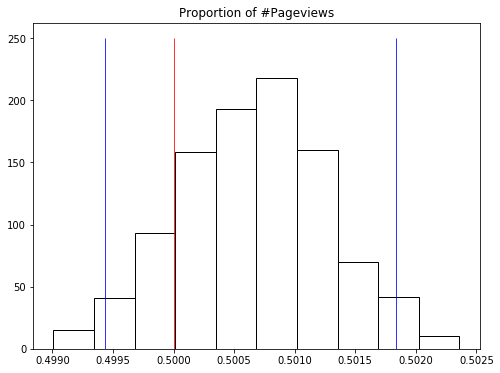

In [92]:
# Pageviews (Cookies)

x = np.array([1, 0])  # Use binary to denote where 1 is control pageviews and 0 is experiment pageviews
pool_vector =  np.repeat(x, [control_pageviews, experiment_pageviews], axis=0)
ratio_vector = np.zeros(num_loop)
for i in range(num_loop):
    pool_resample = np.random.choice(pool_vector, size=len(pool_vector), replace=True)
    ratio_vector[i] = sum(pool_resample) / len(pool_vector)

ratio_vector.sort()
lower_bound = ratio_vector[int(num_loop*alpha/2)]
upper_bound = ratio_vector[int(num_loop-(num_loop*alpha/2))]

fig = plt.figure(figsize = (8, 6))
plt.hist(ratio_vector, edgecolor='k', color='white');
plt.vlines(0.5, 0, 250, color = 'red', linewidth=0.8)
plt.vlines(lower_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.vlines(upper_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.title('Proportion of #Pageviews');

As we can see, we draw the same conclusion that the number of pageviews passess the significance test, it's not statistical significance. That means, the difference between the number of cookies in the control and experiment groups is due to random chance.

Use the same bootstrap method to whether the ratio of control clicks over total clicks is different from 0.5.

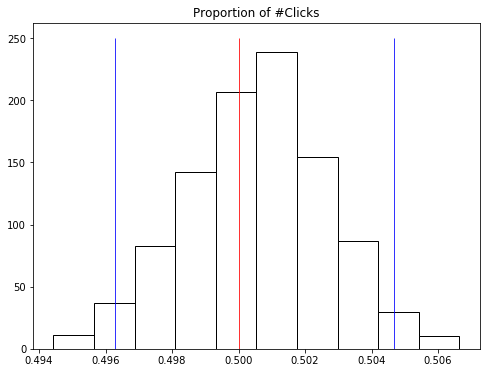

In [93]:
# Clicks

x = np.array([1, 0])  
pool_vector =  np.repeat(x, [control_clicks, experiment_clicks], axis=0)
ratio_vector = np.zeros(num_loop)
for i in range(num_loop):
    pool_resample = np.random.choice(pool_vector, size=len(pool_vector), replace=True)
    ratio_vector[i] = sum(pool_resample) / len(pool_vector)

ratio_vector.sort()
lower_bound = ratio_vector[int(num_loop*alpha/2)]
upper_bound = ratio_vector[int(num_loop - (num_loop*alpha/2))]

fig = plt.figure(figsize = (8, 6))
plt.hist(ratio_vector, edgecolor='k', color='white');
plt.vlines(0.5, 0, 250, color = 'red', linewidth=0.8)
plt.vlines(lower_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.vlines(upper_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.title('Proportion of #Clicks');

Again, the can't reject the null hypothesisi and the result that number of clicks assigned to control an dexperiment group is statistically insignificance. Thus, the number of clicks is randomly assigned into the experiment and control groups.

For the last invariant metric click-through-probability, use bootstrap to measure if there is significance difference between the click-through-probability of the experiment and control groups. In this case, the null hypothesis is: diff = 0.

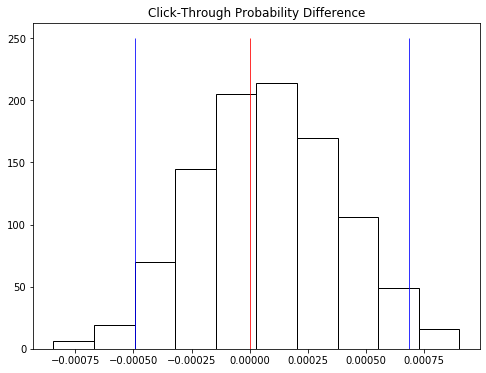

In [94]:
# Click-Through Probability

# calculate of the difference vector, 
# build confidence interval around its average using resampling method.
control_ctp = control['Clicks'] / control['Pageviews']
experiment_ctp = experiment['Clicks'] / experiment['Pageviews']
diff_ctp = experiment_ctp - control_ctp
avg_diff_ctp = np.mean(diff_ctp)

diff_vector = np.zeros(num_loop)

for i in range(num_loop):
    pool_resample = np.random.choice(diff_ctp, size=len(diff_ctp), replace=True)
    diff_vector[i] = np.mean(pool_resample)

diff_vector.sort()
lower_bound = diff_vector[int(num_loop*alpha/2)]
upper_bound = diff_vector[int(num_loop - (num_loop*alpha/2))]

fig = plt.figure(figsize = (8, 6))
plt.hist(diff_vector, edgecolor='k', color='white');
plt.vlines(0, 0, 250, color = 'red', linewidth=0.8)
plt.vlines(lower_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.vlines(upper_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.title('Click-Through Probability Difference');

As we can see from the figure, 0 lays inside the Confidence Inteval, so the difference between the two groups is insignificant. We accept the null hypothesis that there is no difference in click-through-probability between two groups.

### 5.2 Check for Practical and Statistical Significance
Next, for your __evaluation metrics__, calculate a confidence interval for the difference between the experiment and control groups, and check whether each metric is statistically and/or practically significance. __A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change)__, and __it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)__

If you have chosen multiple evaluation metrics, you will need to decide whether to use the Bonferroni correction. When deciding, keep in mind the results you are looking for in order to launch the experiment. Will the fact that you have multiple metrics make those results more likely to occur by chance than the alpha level of 0.05?

As all sanity checks are passed for invariant metrics, and the experiment data is validated to some extent. We can go foward and analyze the evaluation metrics

__What we need to do is assessing thwther the differences between evaluation metric values of the control and experiment groups are significant or not.__ Previously, we had chosen __gross conversion__ and __net conversion__ as the two evaluation metrics. 

We would expect the gross conversion to be lower in the experiment group since the number of enrollments should be lowered, and we expect not to see any significant difference between the net conversion rate of the experiment and control.

In [ ]:
control2 = control.dropna()
experiment2 = experiment.dropna()

In [26]:
control2_pageviews = control2['Pageviews'].sum()
experiment2_pageviews = experiment2['Pageviews'].sum()

control2_clicks = control2['Clicks'].sum()
experiment2_clicks = experiment2['Clicks'].sum()

control2_enrollments = control2['Enrollments'].sum()
experiment2_enrollments = experiment2['Enrollments'].sum()

control2_payments = control2['Payments'].sum()
experiment2_payments = experiment2['Payments'].sum()

summary2 = pd.DataFrame({'Control': [control2_pageviews, control2_clicks, control2_enrollments, control2_payments],
                         'Experiment': [experiment2_pageviews, experiment2_clicks, experiment2_enrollments, experiment2_payments]},
                       index = ['Pageviews', 'Clicks', 'Enrollments', 'Payments'])
summary2

,Control,Experiment
Pageviews,212163.0,211362.0
Clicks,17293.0,17260.0
Enrollments,3785.0,3423.0
Payments,2033.0,1945.0


In [27]:
summary2.loc['Gross Conversion'] = summary2.loc['Enrollments'] / summary2.loc['Clicks']
summary2.loc['Net Conversion'] = summary2.loc['Payments'] / summary2.loc['Clicks']
summary2

,Control,Experiment
Pageviews,212163.000000,211362.000000
Clicks,17293.000000,17260.000000
Enrollments,3785.000000,3423.000000
Payments,2033.000000,1945.000000
Gross Conversion,0.218875,0.198320
Net Conversion,0.117562,0.112688


__Gross Conversion__

In [28]:
# For Gross Conversion
gross_conversion_p_pool = summary2.loc['Enrollments'].sum() / summary2.loc['Clicks'].sum()
gross_conversion_SE_pool = np.sqrt(gross_conversion_p_pool*(1-gross_conversion_p_pool)*(1/summary2['Control']['Clicks']+1/summary2['Experiment']['Clicks']))
gross_conversion_diff = summary2['Experiment']['Gross Conversion'] - summary2['Control']['Gross Conversion']

# Null hypothesis: gross_conversion_diff = 0
# Test if there's significant difference in gross conversion between two groups
alpha = 0.05
gross_conversion_mag_err = get_z_score(alpha) * gross_conversion_SE_pool
gross_conversion_lower = gross_conversion_diff - gross_conversion_mag_err
gross_conversion_upper = gross_conversion_diff + gross_conversion_mag_err

print("Gross Conversion:")
print("\tPooled Probability:", round(gross_conversion_p_pool, 4))
print("\tPooled Standard Error:", round(gross_conversion_SE_pool, 4))
print("\tDifference d_hat:", round(gross_conversion_diff, 4))
print("\tMargin of Error:", round(gross_conversion_mag_err, 4))
print("\tPractical Significance boundary: (", -d_min_gross_conversion, ",", d_min_gross_conversion, ")")
print("\tConfidence Interval: (", round(gross_conversion_lower, 4), ",", round(gross_conversion_upper, 4), ")")

# Test Statistical Significance
if (0 > gross_conversion_lower) & (0 < gross_conversion_upper):
    print("\tStatistically Insignificance")
else:
    print("\tStatistically Significance")
    
# Test Practical Significance
# Practical Significance level: d_min_gross_conversion = 0.01
if ((d_min_gross_conversion < gross_conversion_lower) or (-d_min_gross_conversion > gross_conversion_upper)):
    print("\tPractical Significance")
else:
    print("\tPractical Insignificance")


Gross Conversion:
	Pooled Probability: 0.2086
	Pooled Standard Error: 0.0044
	Difference d_hat: -0.0206
	Margin of Error: 0.0086
	Practical Significance boundary: ( -0.01 , 0.01 )
	Confidence Interval: ( -0.0291 , -0.012 )
	Statistically Significance
	Practical Significance


I can also use the bootstrap method to measure gross conversion to see if it's significantly lower in the experiment group comparing to the control group.

In [107]:
# bootstrap
gross_conversion_cnt = control2['Enrollments'] / control2['Clicks']
gross_conversion_exp = experiment2['Enrollments'] / experiment2['Clicks']

gross_conversion_diff = gross_conversion_exp - gross_conversion_cnt
gross_conversion_diff_avg = np.mean(gross_conversion_diff)
gross_conversion_diff_avg

-0.02078458202926592

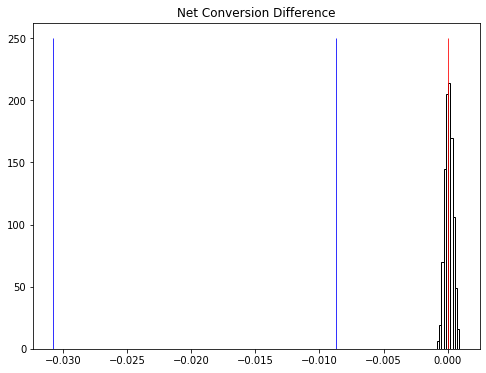

In [108]:
gross_conversion_avg_vector = np.zeros(num_loop)

pool = gross_conversion_exp.append(gross_conversion_cnt)
pool = np.array(pool)
   
for i in range(num_loop):
    resample = np.random.choice(gross_conversion_diff, size=len(gross_conversion_exp), replace=True)
    gross_conversion_avg_vector[i] = np.mean(resample)

gross_conversion_avg_vector.sort()
lower_bound = gross_conversion_avg_vector[int(num_loop*alpha/2)]
upper_bound = gross_conversion_avg_vector[int(num_loop - (num_loop*alpha/2))]

fig = plt.figure(figsize = (8, 6))
plt.hist(diff_vector, edgecolor='k', color='white');
plt.vlines(0, 0, 250, color = 'red', linewidth=0.8)
plt.vlines(lower_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.vlines(upper_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.title('Net Conversion Difference');

As we can see from the figure, 0 doesn't lay inside the confidence interval. It shows that the obsevered result is statistically significant. Besides, since the result is on the left hand side of the 0, our expectation is met and the gross conversion rate of the experiment group is lower than the control group.

__Net Conversion__

In [29]:
# For Net Conversion
net_conversion_p_pool = summary2.loc['Payments'].sum() / summary2.loc['Clicks'].sum()
net_conversion_SE_pool = np.sqrt(net_conversion_p_pool*(1-net_conversion_p_pool)*(1/summary2['Control']['Clicks']+1/summary2['Experiment']['Clicks']))
net_conversion_diff = summary2['Experiment']['Net Conversion'] - summary2['Control']['Net Conversion']

# Null hypothesis: net_conversion_diff = 0
# Test if there's significant difference in net conversion between two groups
alpha = 0.05
net_conversion_mag_err = get_z_score(alpha) * net_conversion_SE_pool
net_conversion_lower = net_conversion_diff - net_conversion_mag_err
net_conversion_upper = net_conversion_diff + net_conversion_mag_err

print("Net Conversion:")
print("\tPooled Probability:", round(net_conversion_p_pool, 4))
print("\tPooled Standard Error:", round(net_conversion_SE_pool, 4))
print("\tDifference d_hat:", round(net_conversion_diff, 4))
print("\tMargin of Error:", round(net_conversion_mag_err, 4))
print("\tPractical Significance boundary: (", -d_min_net_conversion, ",", d_min_net_conversion, ")")
print("\tConfidence Interval: (", round(net_conversion_lower, 4), ",", round(net_conversion_upper, 4), ")")

# Test Statistical Significance
if (0 > net_conversion_lower) & (0 < net_conversion_upper):
    print("\tStatistically Insignificance")
else:
    print("\tStatistically Significance")
    
# Test Practical Significance
# Practical Significance level: d_min_net_conversion = 0.0075
if ((d_min_net_conversion < net_conversion_lower) or (-d_min_net_conversion > net_conversion_upper)):
    print("\tPractical Significance")
else:
    print("\tPractical Insignificance")

Net Conversion:
	Pooled Probability: 0.1151
	Pooled Standard Error: 0.0034
	Difference d_hat: -0.0049
	Margin of Error: 0.0067
	Practical Significance boundary: ( -0.0075 , 0.0075 )
	Confidence Interval: ( -0.0116 , 0.0019 )
	Statistically Insignificance
	Practical Insignificance


Now, using the Bootstrap method to check whether the observed value is exceptional under given alpha and assumed null hypothesis.

In [95]:
# Bootstrap
net_conversion_cnt = control2['Payments']/control2['Clicks']
net_conversion_exp = experiment2['Payments']/experiment2['Clicks']

net_conversion_diff = net_conversion_exp - net_conversion_cnt
net_conversion_diff_avg = np.mean(net_conversion_diff)
net_conversion_diff_avg

-0.004896856989809377

The average net conversion value is negative one, so the net conversion rate in the experiment group is lower than the control group.

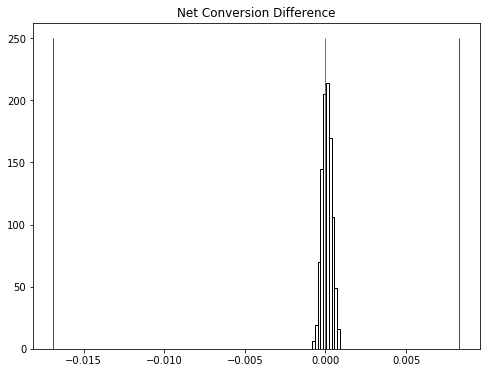

In [106]:
net_conversion_avg_vector = np.zeros(num_loop)

pool = net_conversion_exp.append(net_conversion_cnt)
pool = np.array(pool)
   
for i in range(num_loop):
    resample = np.random.choice(net_conversion_diff, size = len(net_conversion_exp), replace = True)
    net_conversion_avg_vector[i] = np.mean(resample)

net_conversion_avg_vector.sort()
lower_bound = net_conversion_avg_vector[int(num_loop*alpha/2)]
upper_bound = net_conversion_avg_vector[int(num_loop - (num_loop*alpha/2))]

fig = plt.figure(figsize = (8, 6))
plt.hist(diff_vector, edgecolor='k', color='white');
plt.vlines(0, 0, 250, color = 'red', linewidth=0.8)
plt.vlines(lower_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.vlines(upper_bound, 0, 250, color = 'blue', linewidth=0.8)
plt.title('Net Conversion Difference');

As it can be seen, the difference between net conversion rate of the two expriment and control groups is insignificant. This is exactly what we expected, and it crossponds to the previous analytical results.

We have measured two metrics in one experiment. Applying the Bonferroni correction means that the a-level for each hypothesis will be 2.5 % instead of 5% and confidential intervals will be significantly wider. It is too conservative for some reasons.

The use of the Bonferroni correction would really be needed if we test several metrics in one experiment and expect that at least one metrics will demonstrate the statistically significant change. In the set of metrics, this matching only for one indicator can be an absolutely random event, therefore the experiment will have a false positive result. It means we should increase the confidential intervals to avoid this situation and apply the Bonferroni correction.

But in the case of our experiment, we expect two metrics will have matched our criteria at the same time to proceed with the launch. It's a very strong condition without any correction. The positive results will be more likely to occur not by chance. Therefore, the Bonferroni correction could be the cause to approve the wrong null hypothesis and we should not use it this time.

Also, our metrics have a strong relationship between each other. If we know the outcome of one test of a difference between the control and experimental groups on one metrics, it would be easy to predict and to find the outcome of the other tests on the other metrics. It's absolutely natural to expect their behavior will be similar simultaneously.

### 5.3 Run Sign Tests
For each evaluation metric, do a sign test using the day-by-day breakdown. If the sign test does not agree with the confidence interval for the difference, see if you can figure out why.

__Sign test is basically checking whether the signs, either positive or negative, of the differences of the metrics between two groups are meaningfully distributed over the days of the experiment or not.__
For instance, if in every single day of the experiment the gross conversion rate is lower in the experiment group comparing to the control group, then being so assures us further that this metric is significantly reduced due to the experiment.

__The null hypothesis is the proportion of negative signs to the number of experiment days is a random and insignificant value.__ Thus, this is a one sample proportion test.

For the net conversion rate sign test, I consider being negative as the baseline, and I check whether the observed number of negative values is statsitically significant or not.

In [30]:
# For gross conversion in each groups each day

gross_conversion_success = gross_conversion_exp > gross_conversion_cnt
gross_conversion_success_times = gross_conversion_success.sum()
gross_conversion_total_times = len(gross_conversion_success)

print('Gross Conversion Success Times:', gross_conversion_success_times)
print('Gross Conversion Total Times:', gross_conversion_total_times)

Gross Conversion Success Times: 4
Gross Conversion Total Times: 23


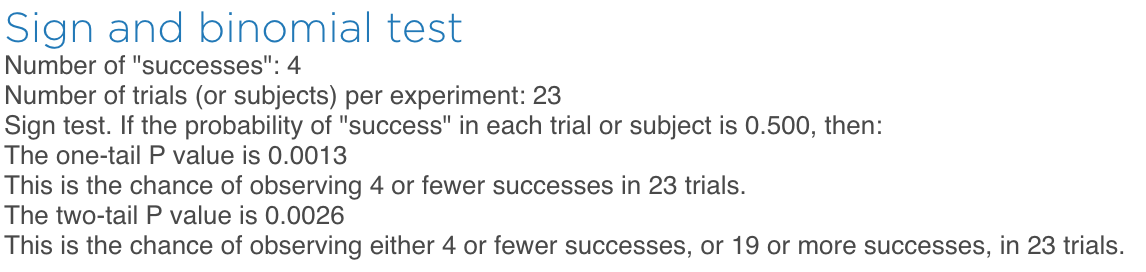

__Gross Conversion Sign Test__
- p_value: 0.0026
- Statistical Significance

In [31]:
# For net conversion in each groups each day

net_conversion_success = net_conversion_exp > net_conversion_cnt
net_conversion_success_times = net_conversion_success.sum()
net_conversion_total_times = len(net_conversion_success)

print('Net Conversion Success Times:', net_conversion_success_times)
print('Net Conversion Total Times:', net_conversion_total_times)

Net Conversion Success Times: 10
Net Conversion Total Times: 23


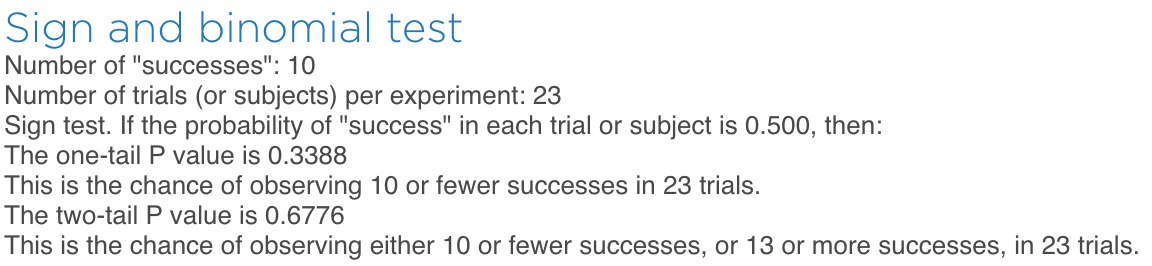

__Net Conversion Sign Test__
- p_value: 0.6776
- Statistical Insignificance

Eventually, the effective size and sign tests show that the site change would statistically significantly reduce the gross conversion, but would not affect the net conversion in a statistically significant way. The effect size test states this in the practical meaning also.

I did not use the Bonferroni correction for any calculations because it will be too conservative in the case of highly related metrics which should give the expected result simultaneously.

### 5.4 Recommendation
Finally, make a recommendation. Would you launch this experiment, not launch it, dig deeper, run a follow-up experiment, or is it a judgment call? If you would dig deeper, explain what area you would investigate. If you would run follow-up experiments, briefIy describe that experiment. If it is a judgment call, explain what factors would be relevant to the decision.

The recommendation is not to launch the experiment change because the negative results have outweighed the positive ones.

Positive results of the experiment:
- The difference for the gross conversion is practically significant and negative. This is a good sign: the Udacity team can lower costs by a number of trial signups.
- The difference for the net conversion is not statistically significant. It means the absence of serious financial losses.

Negative results of the experiment:
- The interval for the difference in the case of the net conversion includes negative numbers. Therefore, the team has a risk to decrease incomes.
- We have not gathered enough data to draw conclusions about the retention and because of this we can not evaluate correctly the difference between the control and experimental groups for a number of students who were disappointed in studying during the free period. Consequently, we do not know enrolled users would be disappointed in the learning process less and make more payments or would not.


## 6 Follow-up Experiment: How to Reduce Early Cancellations
If you wanted to reduce the number of frustrated students who cancel early in the course, what experiment would you try? Give a brief description of the change you would make, what your hypothesis would be about the effect of the change, what metrics you would want to measure, and what unit of diversion you would use. Include an explanation of each of your choices.

### 6.1 Tests on Retention
Since I didn't analyze the evaluation metric "Retention" before, so here I run two tests for "Retention", which are __Practical and Statistical Significance Tests__ and __Sign Test__.

__Retention__

In [32]:
summary2.loc['Retention'] = summary2.loc['Payments'] / summary2.loc['Enrollments']
summary2

,Control,Experiment
Pageviews,212163.000000,211362.000000
Clicks,17293.000000,17260.000000
Enrollments,3785.000000,3423.000000
Payments,2033.000000,1945.000000
Gross Conversion,0.218875,0.198320
Net Conversion,0.117562,0.112688
Retention,0.537120,0.568215


In [33]:
# For Retention
retention_p_pool = summary2.loc['Payments'].sum() / summary2.loc['Enrollments'].sum()
retention_SE_pool = np.sqrt(retention_p_pool*(1-retention_p_pool)*(1/summary2['Control']['Enrollments']+1/summary2['Experiment']['Enrollments']))
retention_diff = summary2['Experiment']['Retention'] - summary2['Control']['Retention']

# Null hypothesis: retention_diff = 0
# Test if there's significant difference in retention between two groups
alpha = 0.05
retention_mag_err = get_z_score(alpha) * retention_SE_pool
retention_lower = retention_diff - retention_mag_err
retention_upper = retention_diff + retention_mag_err

print("Retention:")
print("\tPooled Probability:", round(retention_p_pool, 4))
print("\tPooled Standard Error:", round(retention_SE_pool, 4))
print("\tDifference d_hat:", round(retention_diff, 4))
print("\tMargin of Error:", round(retention_mag_err, 4))
print("\tPractical Significance boundary: (", -d_min_retention, ",", d_min_retention, ")")
print("\tConfidence Interval: (", round(retention_lower, 4), ",", round(retention_upper, 4), ")")

# Test Statistical Significance
if (0 > retention_lower) & (0 < retention_upper):
    print("\tStatistically Insignificance")
else:
    print("\tStatistically Significance")
    
# Test Practical Significance
# Practical Significance level: d_min_retention = 0.01
if ((d_min_retention < retention_lower) or (-d_min_retention > retention_upper)):
    print("\tPractical Significance")
else:
    print("\tPractical Insignificance")

Retention:
	Pooled Probability: 0.5519
	Pooled Standard Error: 0.0117
	Difference d_hat: 0.0311
	Margin of Error: 0.023
	Practical Significance boundary: ( -0.01 , 0.01 )
	Confidence Interval: ( 0.0081 , 0.0541 )
	Statistically Significance
	Practical Insignificance


In [34]:
# For retention in each groups each day
retention_cnt = control2['Payments'] / control2['Enrollments']
retention_exp = experiment2['Payments'] / experiment2['Enrollments']

retention_success = retention_exp > retention_cnt
retention_success_times = retention_success.sum()
retention_total_times = len(retention_success)

print('Retention Success Times:', retention_success_times)
print('Retention Total Times:', retention_total_times)

Retention Success Times: 13
Retention Total Times: 23


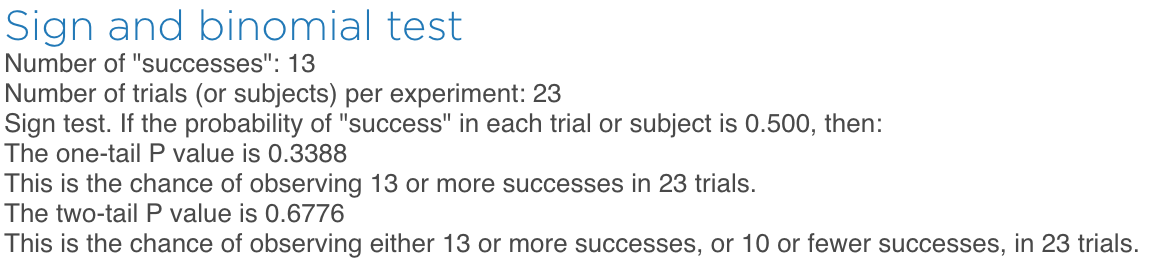

__Retention Sign Test__
- p_value: 0.6776
- Statistical Insignificance

### 6.2 Conclusion
Experiment set-up remains unchanged:
- Unit of diversion: cookies (pageviews)
- Invariant metrics: number of cookies, number of clicks, click-through-probability
- Evaluation matrics: gross conversion, retention, net conversion

Hypotheses of metrics remain unchanges:
- gross conversion significantly derease
- retention significancely increase
- net conversion should not decrease

Improvements:
- Extend the experiment period, say 2 months, with consistently monitoring the incomes to avoid financial risks. Setting up a baseline for revenues and if the revenues decline out of certain limits in experiment group, the experiment should stop and reconsider.
- For three evaluation metrics, using 100% traffic to measure them. Since users of the site could be different in backgrounds like education level, nationalities, occupations and so on, any reduction in the participants could negatively affect experiment results.
- Any change made for the experiment should not bring any side-effct to participants, such as negative psychological effect or reduce users with high talent that can pass the course in a short time. Thus, all changes should be only informative and recommendatory. 